In [4]:
import numpy as np
import matplotlib.pylab as plt
from __future__ import division

In [11]:
Psi=np.asarray([
    [.500,.100,.100,.100],
    [.100,.500,.100,.100],
    [.100,.100,.500,.100],
    [.100,.100,.100,.500]
])

n=200
Z_gt=np.asarray([1,0,0,0]*(n)+[0,1,0,0]*(n)+[0,0,1,0]*(n)+[0,0,0,1]*(n)).reshape(4*n,4)
Mz=Z_gt.dot(Psi).dot(Z_gt.T)
X_gt=Z_gt.dot(Z_gt.T)

A=np.random.binomial(1,Mz)
n=A.shape[0]
A=np.triu(A)+np.triu(A).T-2*np.diag(np.diag(A))
lamb=2/(n*(n-1))*np.sum(np.triu(A)-np.diag(np.diag(A)))

In [12]:
def proj_tang(u,sigma):
    return u-np.diag(np.diag(u.dot(sigma.T))).dot(sigma)

def proj_mani(sigma):
    res=sigma/np.outer(np.sqrt(np.sum(sigma**2,axis=1)),np.ones(sigma.shape[1]))
    return res

def gradf(sigma):
    return 2*(B-np.diag(np.diag(B.dot(sigma).dot(sigma.T)))).dot(sigma)

def hessf(sigma,u):
    tmp1=2*(B-np.diag(np.diag(B.dot(sigma).dot(sigma.T)))).dot(u)\
    -2*np.diag(np.diag(B.dot(sigma).dot(u.T)+B.dot(u).dot(sigma.T))).dot(sigma)
    res=proj_tang(tmp1,sigma)
    return res

0 -iter
0.014892246638664126


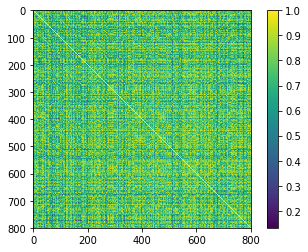

100 -iter
0.0148922467788296


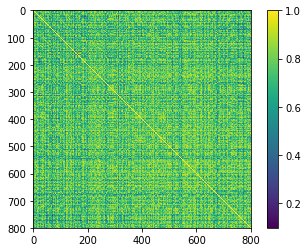

200 -iter
0.014892246922702428


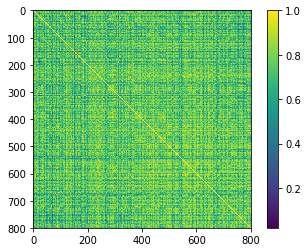

300 -iter
0.014892247048156601


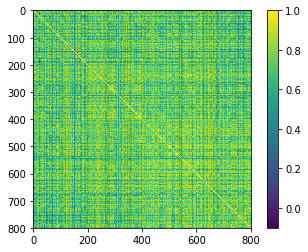

400 -iter
0.01489224712700646


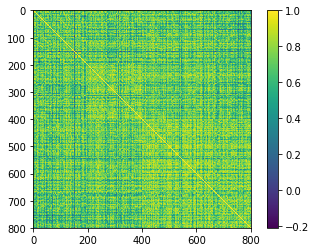

500 -iter
0.014892247172179669


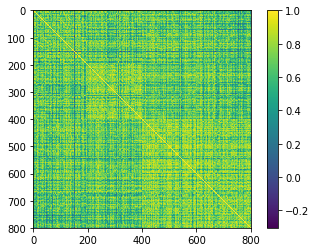

600 -iter
0.014892247198570355


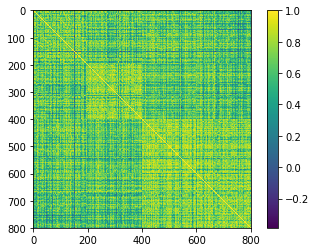

700 -iter
0.01489224721483774


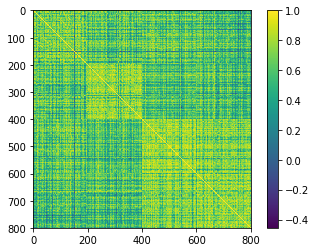

800 -iter
0.014892247225463097


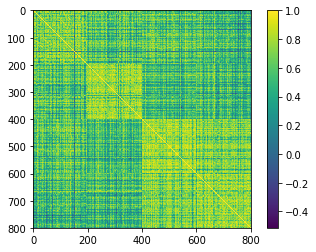

900 -iter
0.014892247232765369


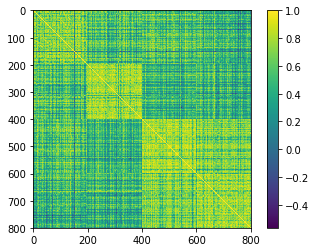

1000 -iter
0.014892247237978329


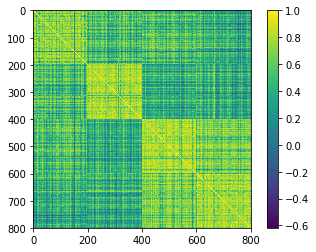

1100 -iter
0.014892247241775033


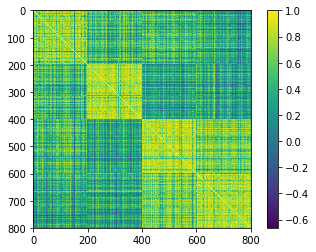

1200 -iter
0.014892247244523208


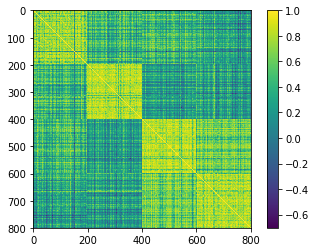

1300 -iter
0.014892247246412135


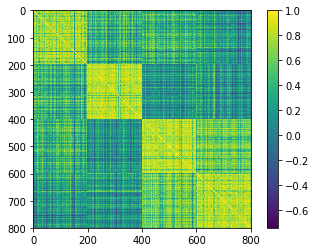

1400 -iter
0.014892247247516647


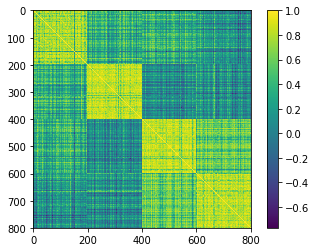

1500 -iter
0.014892247247829494


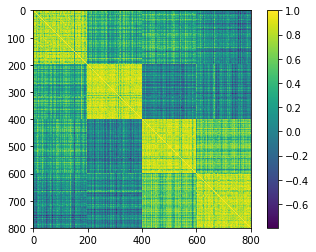

1600 -iter
0.014892247247276334


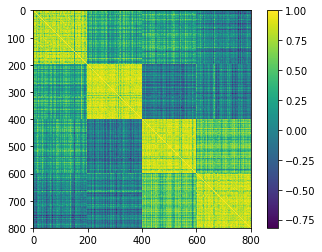

1700 -iter
0.014892247245721663


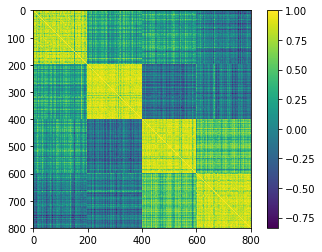

1800 -iter
0.01489224724296947


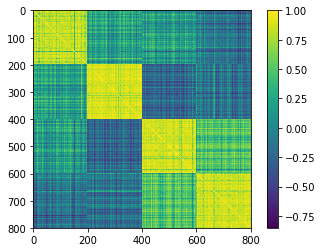

1900 -iter
0.014892247238760061


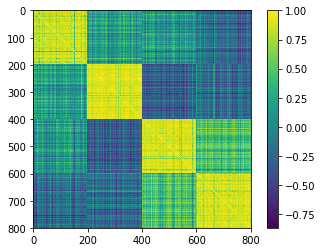

2000 -iter
0.014892247232763995


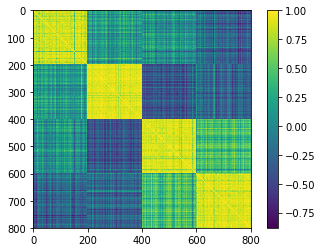

2100 -iter
0.014892247224571652


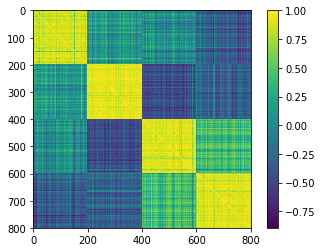

2200 -iter
0.014892247213675032


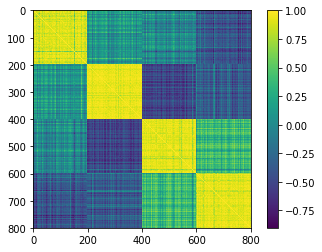

2300 -iter
0.014892247199434347


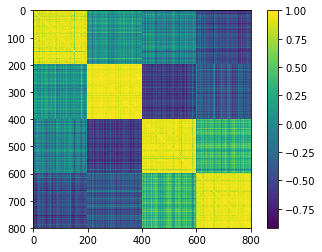

2400 -iter
0.014892247181013618


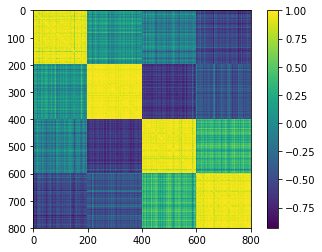

2500 -iter
0.014892247157254299


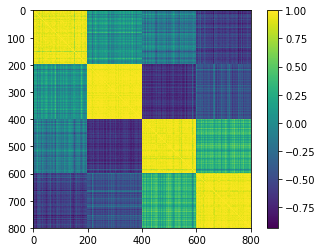

2600 -iter
0.014892247126417067


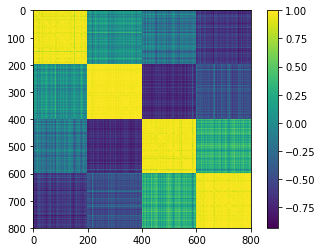

2700 -iter
0.014892247085634103


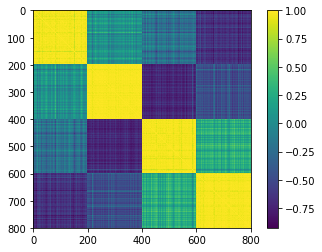

2800 -iter
0.014892247029657633


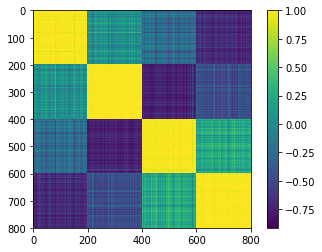

2900 -iter
0.014892246947669224


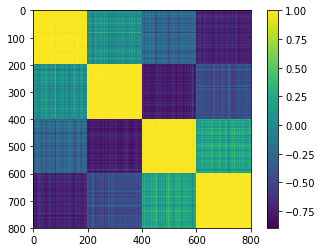

3000 -iter
0.014892246814234084


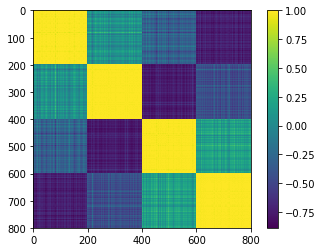

3100 -iter
0.014892246600515276


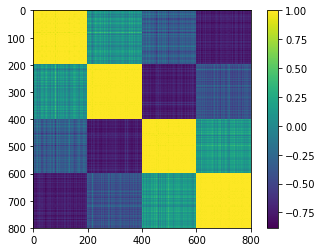

3200 -iter
0.0021079080396769045


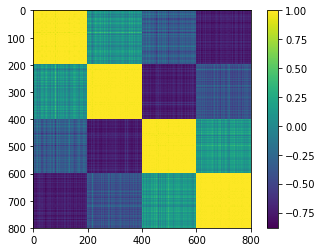

3300 -iter
0.001912214153406044


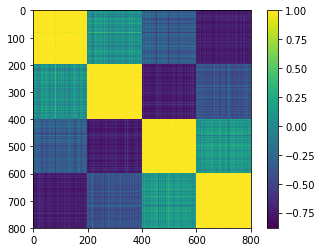

3400 -iter
0.0017982836751532006


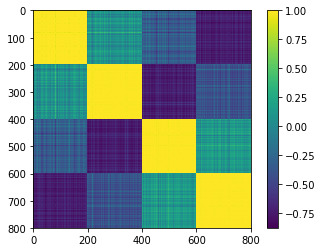

3500 -iter
0.0012177447301347697


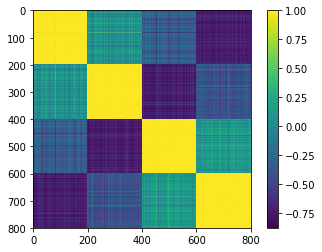

3600 -iter
0.0016207662446920967


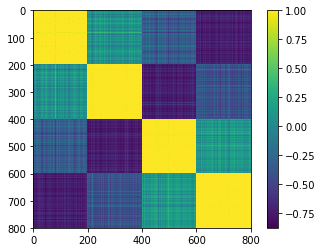

3700 -iter
0.0010451905988480017


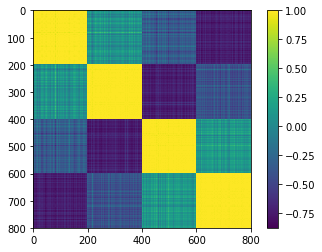

3800 -iter
0.0018743033490317342


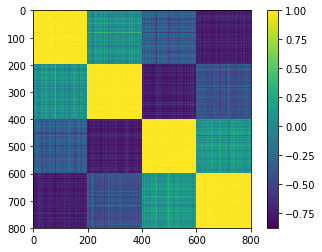

3900 -iter
0.0009158475330505976


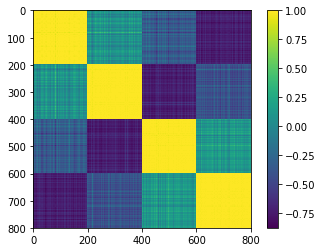

4000 -iter
0.0025067261407854865


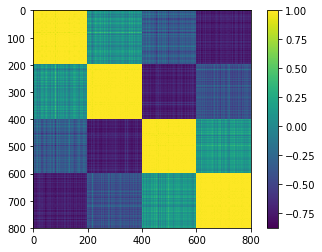

4100 -iter
0.0022465192920340022


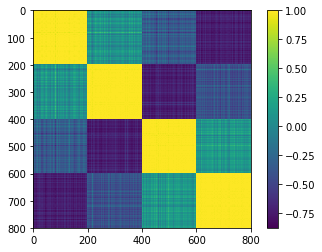

4200 -iter
0.0025454648170234063


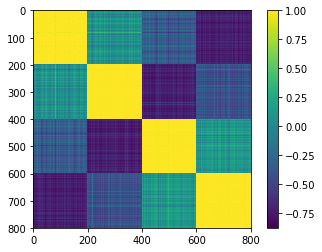

4300 -iter
0.0016014288374413955


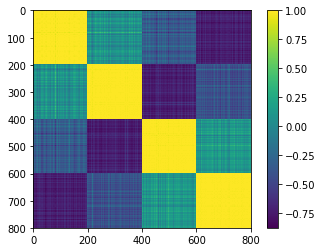

4400 -iter
0.0024185554331875923


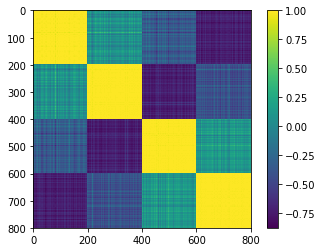

In [ ]:
n=A.shape[0]
lamb=2/(n*(n-1))*np.sum(np.triu(A)-np.diag(np.diag(A)))
B=A-lamb*np.ones((n,n))

# N_H=10*np.linalg.norm(B,ord=1)*log(n)/np.linalg.norm(hess)
N_H=200
mu_G=np.linalg.norm(B,ord=2)
mu_H=np.linalg.norm(B,ord=1)*4
eta_G=mu_G/(20*np.linalg.norm(B,ord=1))
# lamb_H=2*np.sum(u*((A-Lamb).dot(u)))
# eta_H=np.min(np.sqrt(lamb_H/(216*np.linalg.norm(A,ord=1))),lamb_H/(12*np.linalg.norm(A,ord=2)))
k=10
sigma=proj_mani(np.random.rand(n,k))
max_iter=5000

for it in range(max_iter):
    sigma_old=sigma
    grad=gradf(sigma)
    grad_size=np.linalg.norm(grad)   
    
    # Grad-step
    if(grad_size>mu_G):
        u=grad/grad_size
        eta=eta_G
    
    # Eigen-step
    else:
        u=np.random.rand(sigma.shape[0],sigma.shape[1])
        u=proj_tang(u,sigma)
        u=u/np.linalg.norm(u) # check
        for i in range(N_H):
            u=hessf(sigma,u)+mu_H*u
            u=u/np.linalg.norm(u)
        if(np.sum(u*grad)<0): u=-u
        
        Lamb=np.diag(np.diag(B.dot(sigma).dot(sigma.T)))
        lamb_H=2*np.sum(u*((B-Lamb).dot(u)))
        eta_H=np.minimum(np.sqrt(lamb_H/(216*np.linalg.norm(B,ord=1))),lamb_H/(12*np.linalg.norm(B,ord=2)))
        eta=eta_H
    
    # update sigma
    
    sigma=sigma+eta*u
    sigma=np.maximum(sigma,0)
    sigma=proj_mani(sigma)
    
    if(it%1000==0):
        print(it,'-iter')
        print(np.linalg.norm(sigma-sigma_old))
        plt.figure(3)
        plt.imshow(sigma.dot(sigma.T))
        plt.colorbar()
        plt.show()
